# Lecture 1: Linear Algebra Review & Vectorization

This notebook covers the fundamental Linear Algebra concepts from **Stanford CS229 (Summer 2020)**. 
We focus on numerical implementations using NumPy and evaluate the computational efficiency of vectorization.

## Key Objectives:
1. **Vectorization Performance:** Measuring the speedup of matrix operations over iterative loops.
2. **Matrix Operations:** Implementing Rank, Norm, and Trace calculations.
3. **Geometric Interpretation:** Visualizing linear transformations.

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt

%matplotlib inline
print(f"NumPy Version: {np.__version__}")

NumPy Version: 2.4.0


In [6]:
# Create large arrays for benchmarking
size = 1000000
a = np.random.rand(size)
b = np.random.rand(size)

# Iterative Approach (Slow)
tic = time.time()
dot_loop = 0
for i in range(size):
    dot_loop += a[i] * b[i]
toc = time.time()
loop_time = 1000 * (toc - tic)
print(f"Iterative Loop Time: {loop_time:.2f} ms")

# Vectorized Approach (Fast)
tic = time.time()
dot_vec = np.dot(a, b)
toc = time.time()
vec_time = 1000 * (toc - tic)
print(f"Vectorized Time: {vec_time:.2f} ms")

print(f"\nSpeedup: {loop_time / vec_time:.1f}x faster")

Iterative Loop Time: 216.21 ms
Vectorized Time: 2.19 ms

Speedup: 98.7x faster


### 2. Matrix Properties: Rank, Norm, and Singularity
In ML, understanding the structure of our data matrix $A \in \mathbb{R}^{m \times n}$ is vital. 
A matrix is **singular** (non-invertible) if its determinant is zero, often caused by linear dependence between rows or columns.

In [7]:
# Defining a square matrix
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]]) # Note: This is a singular matrix (Rank < 3)

# 1. Rank Calculation
rank_A = np.linalg.matrix_rank(A)
print(f"Matrix Rank: {rank_A}")

# 2. Determinant (Check for Singularity)
det_A = np.linalg.det(A)
print(f"Determinant: {det_A:.2f}")

# 3. Frobenius Norm (Standard norm used in ML for matrices)
norm_fro = np.linalg.norm(A, ord='fro')
print(f"Frobenius Norm: {norm_fro:.2f}")

# 4. Inverse vs. Pseudo-inverse
if np.isclose(det_A, 0):
    print("Matrix is singular. Computing Moore-Penrose pseudo-inverse (pinv).")
    A_pinv = np.linalg.pinv(A)
    print("Pseudo-inverse shape:", A_pinv.shape)
else:
    A_inv = np.linalg.inv(A)
    print("Matrix is invertible.")

Matrix Rank: 2
Determinant: 0.00
Frobenius Norm: 16.88
Matrix is singular. Computing Moore-Penrose pseudo-inverse (pinv).
Pseudo-inverse shape: (3, 3)


### 3. Geometric Interpretation: Matrix as a Linear Map
A matrix $A \in \mathbb{R}^{2 \times 2}$ represents a linear transformation that maps vectors from one space to another. We can visualize this by applying a transformation matrix to a set of points (a unit square).

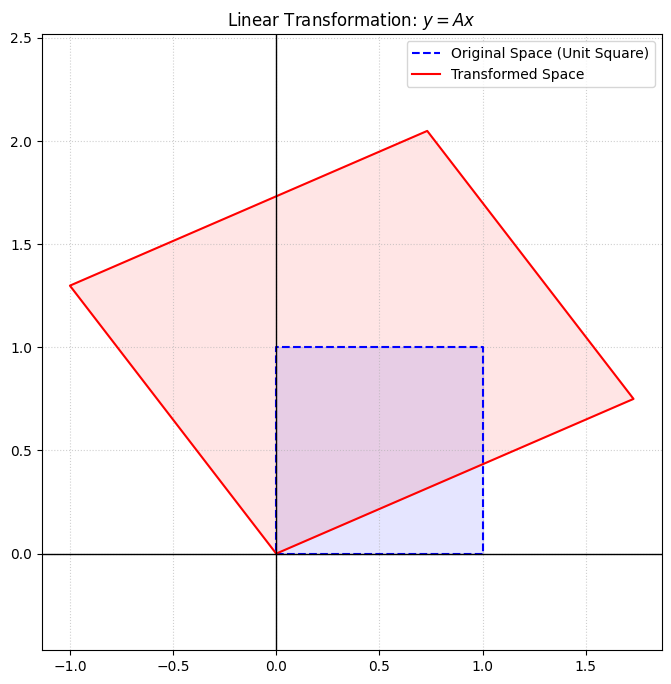

In [8]:
# 1. Define original points (Unit Square)
points = np.array([[0, 1, 1, 0, 0],
                   [0, 0, 1, 1, 0]])

# 2. Define a Transformation Matrix (Rotation + Scaling)
theta = np.radians(30) # 30 degrees
c, s = np.cos(theta), np.sin(theta)
R = np.array([[c, -s], 
              [s,  c]]) # Rotation matrix
S = np.array([[2, 0], 
              [0, 1.5]]) # Scaling matrix

A_transform = S @ R # Combined transformation

# 3. Apply transformation
transformed_points = A_transform @ points

# 4. Visualization
plt.figure(figsize=(8, 8))
plt.plot(points[0, :], points[1, :], 'b--', label='Original Space (Unit Square)')
plt.plot(transformed_points[0, :], transformed_points[1, :], 'r-', label='Transformed Space')
plt.fill(points[0, :], points[1, :], alpha=0.1, color='blue')
plt.fill(transformed_points[0, :], transformed_points[1, :], alpha=0.1, color='red')

plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.title("Linear Transformation: $y = Ax$")
plt.axis('equal')
plt.show()